数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

不同乘客等级的生还率：
   乘客等级       生还率
0     1  0.629630
1     2  0.472826
2     3  0.242363


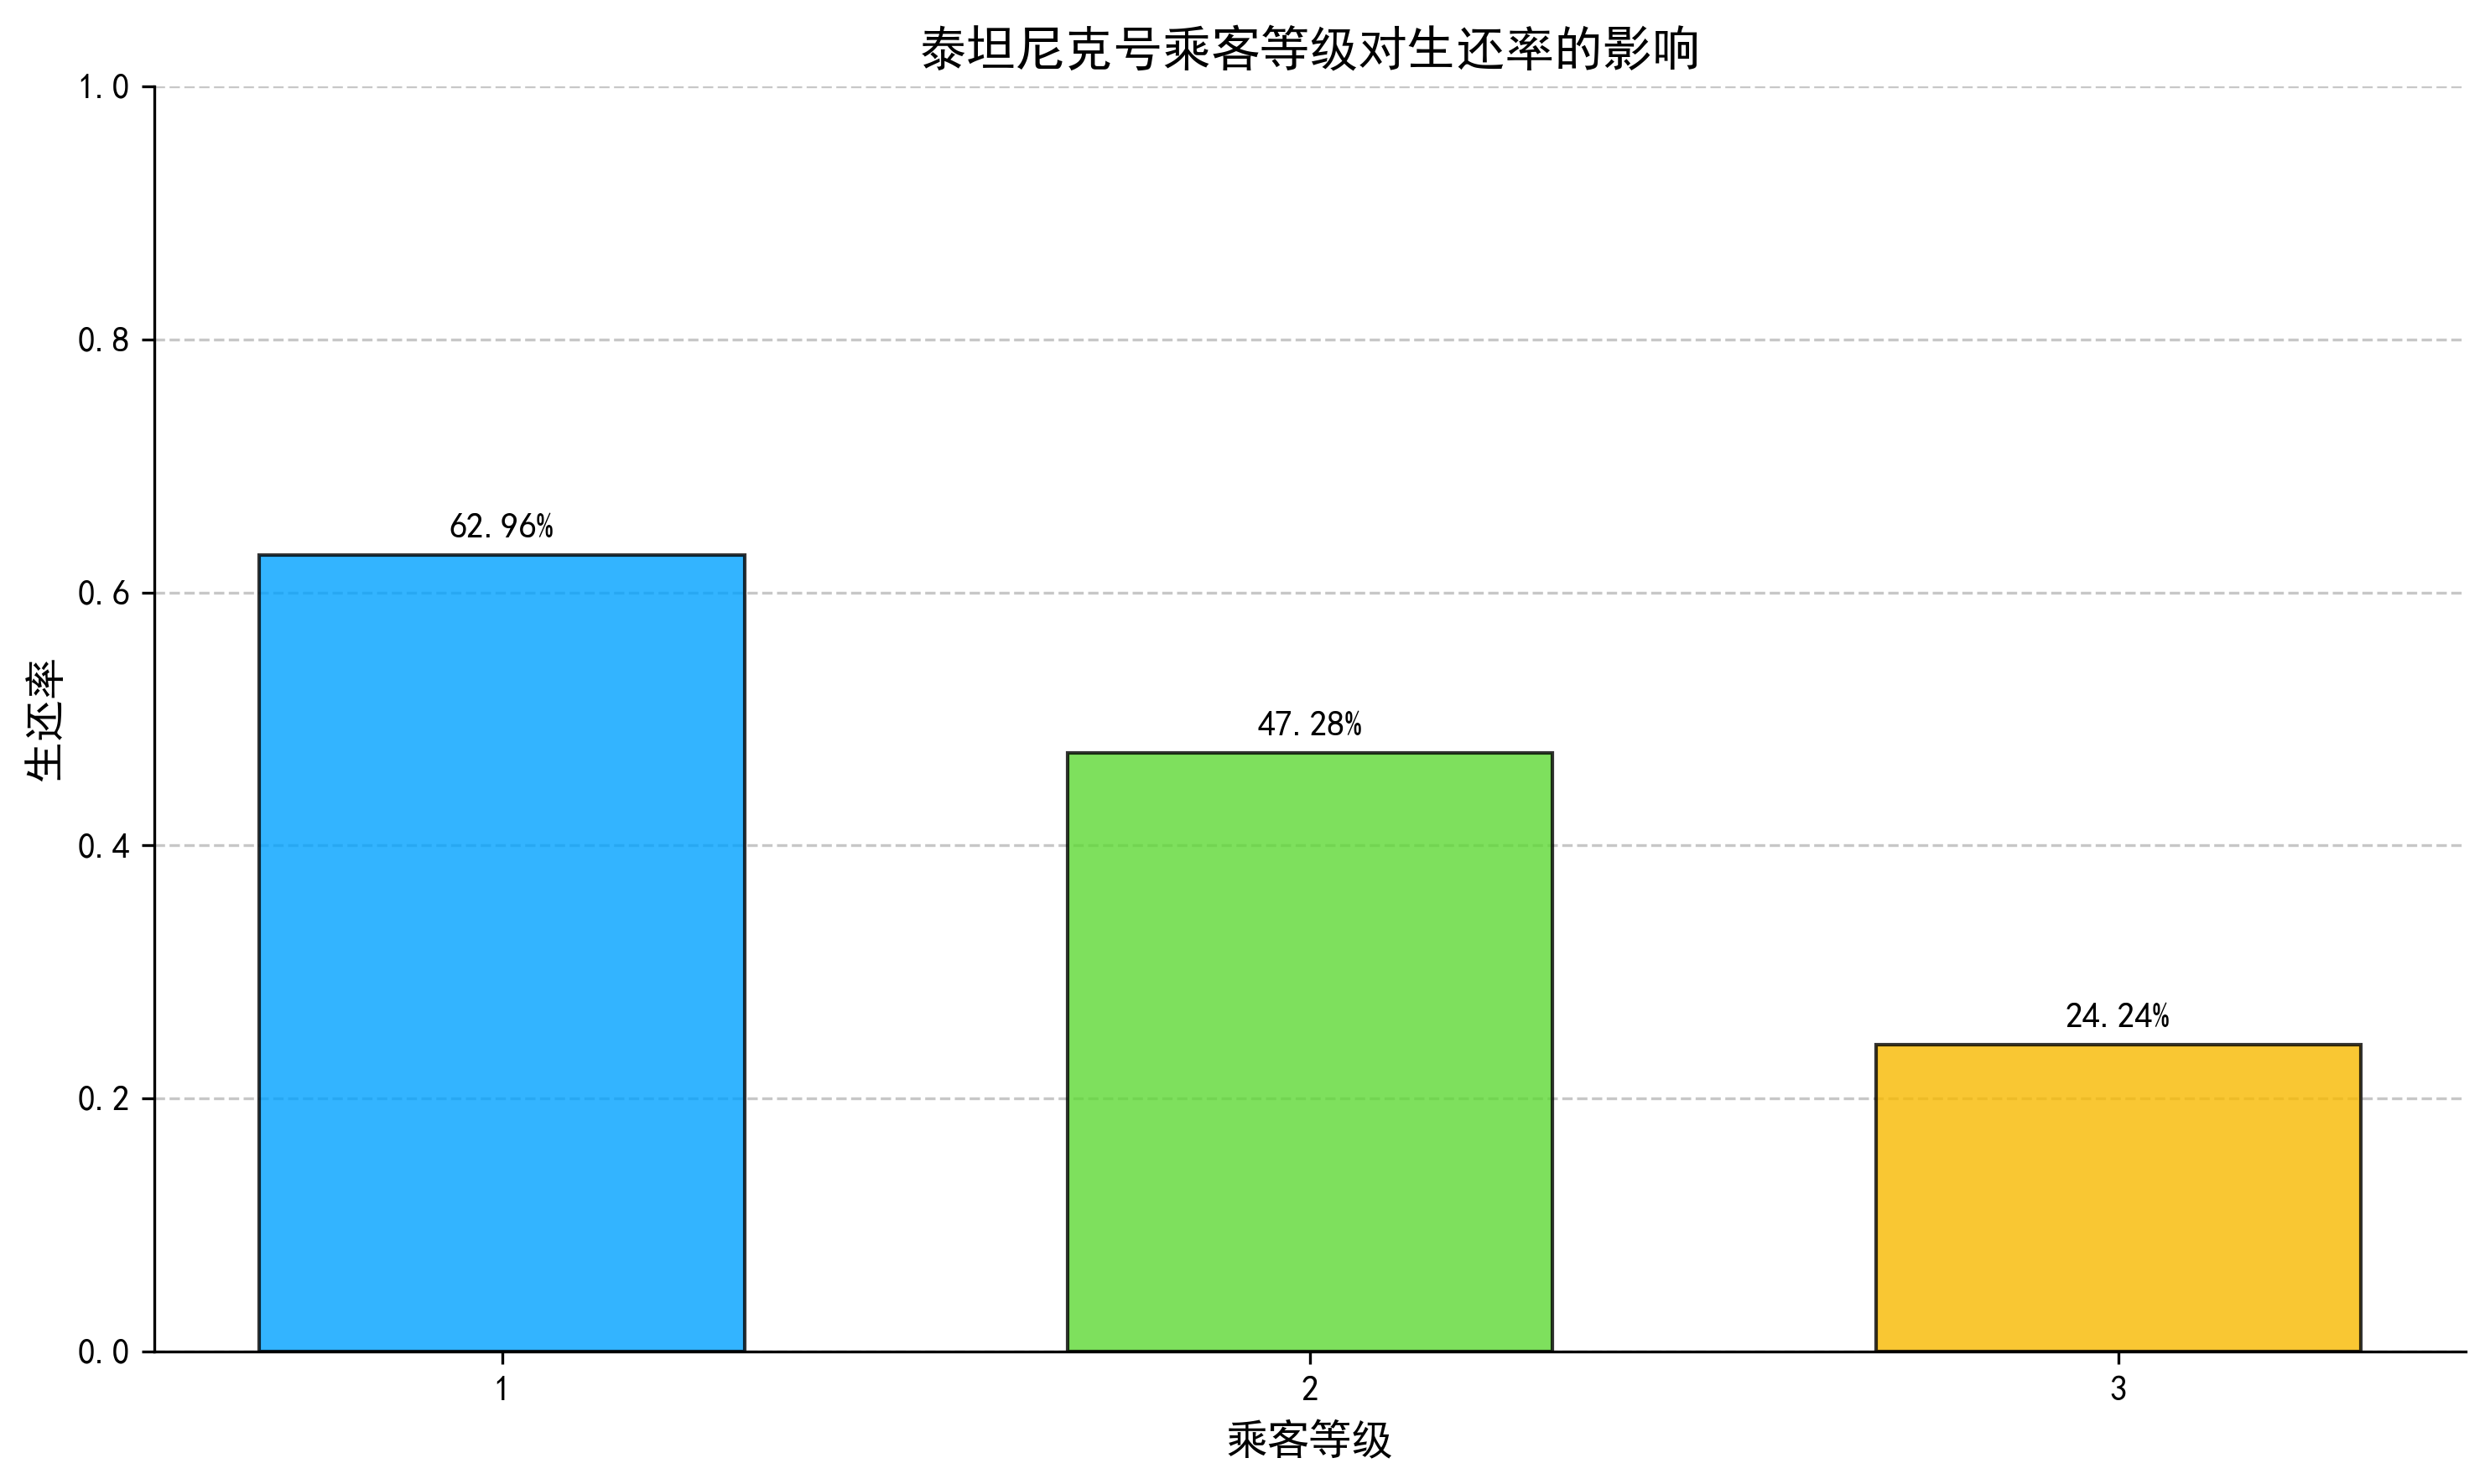


生还等级分布：
  生还等级   人数        比例
0  未生还  549  0.616162
1   生还  342  0.383838


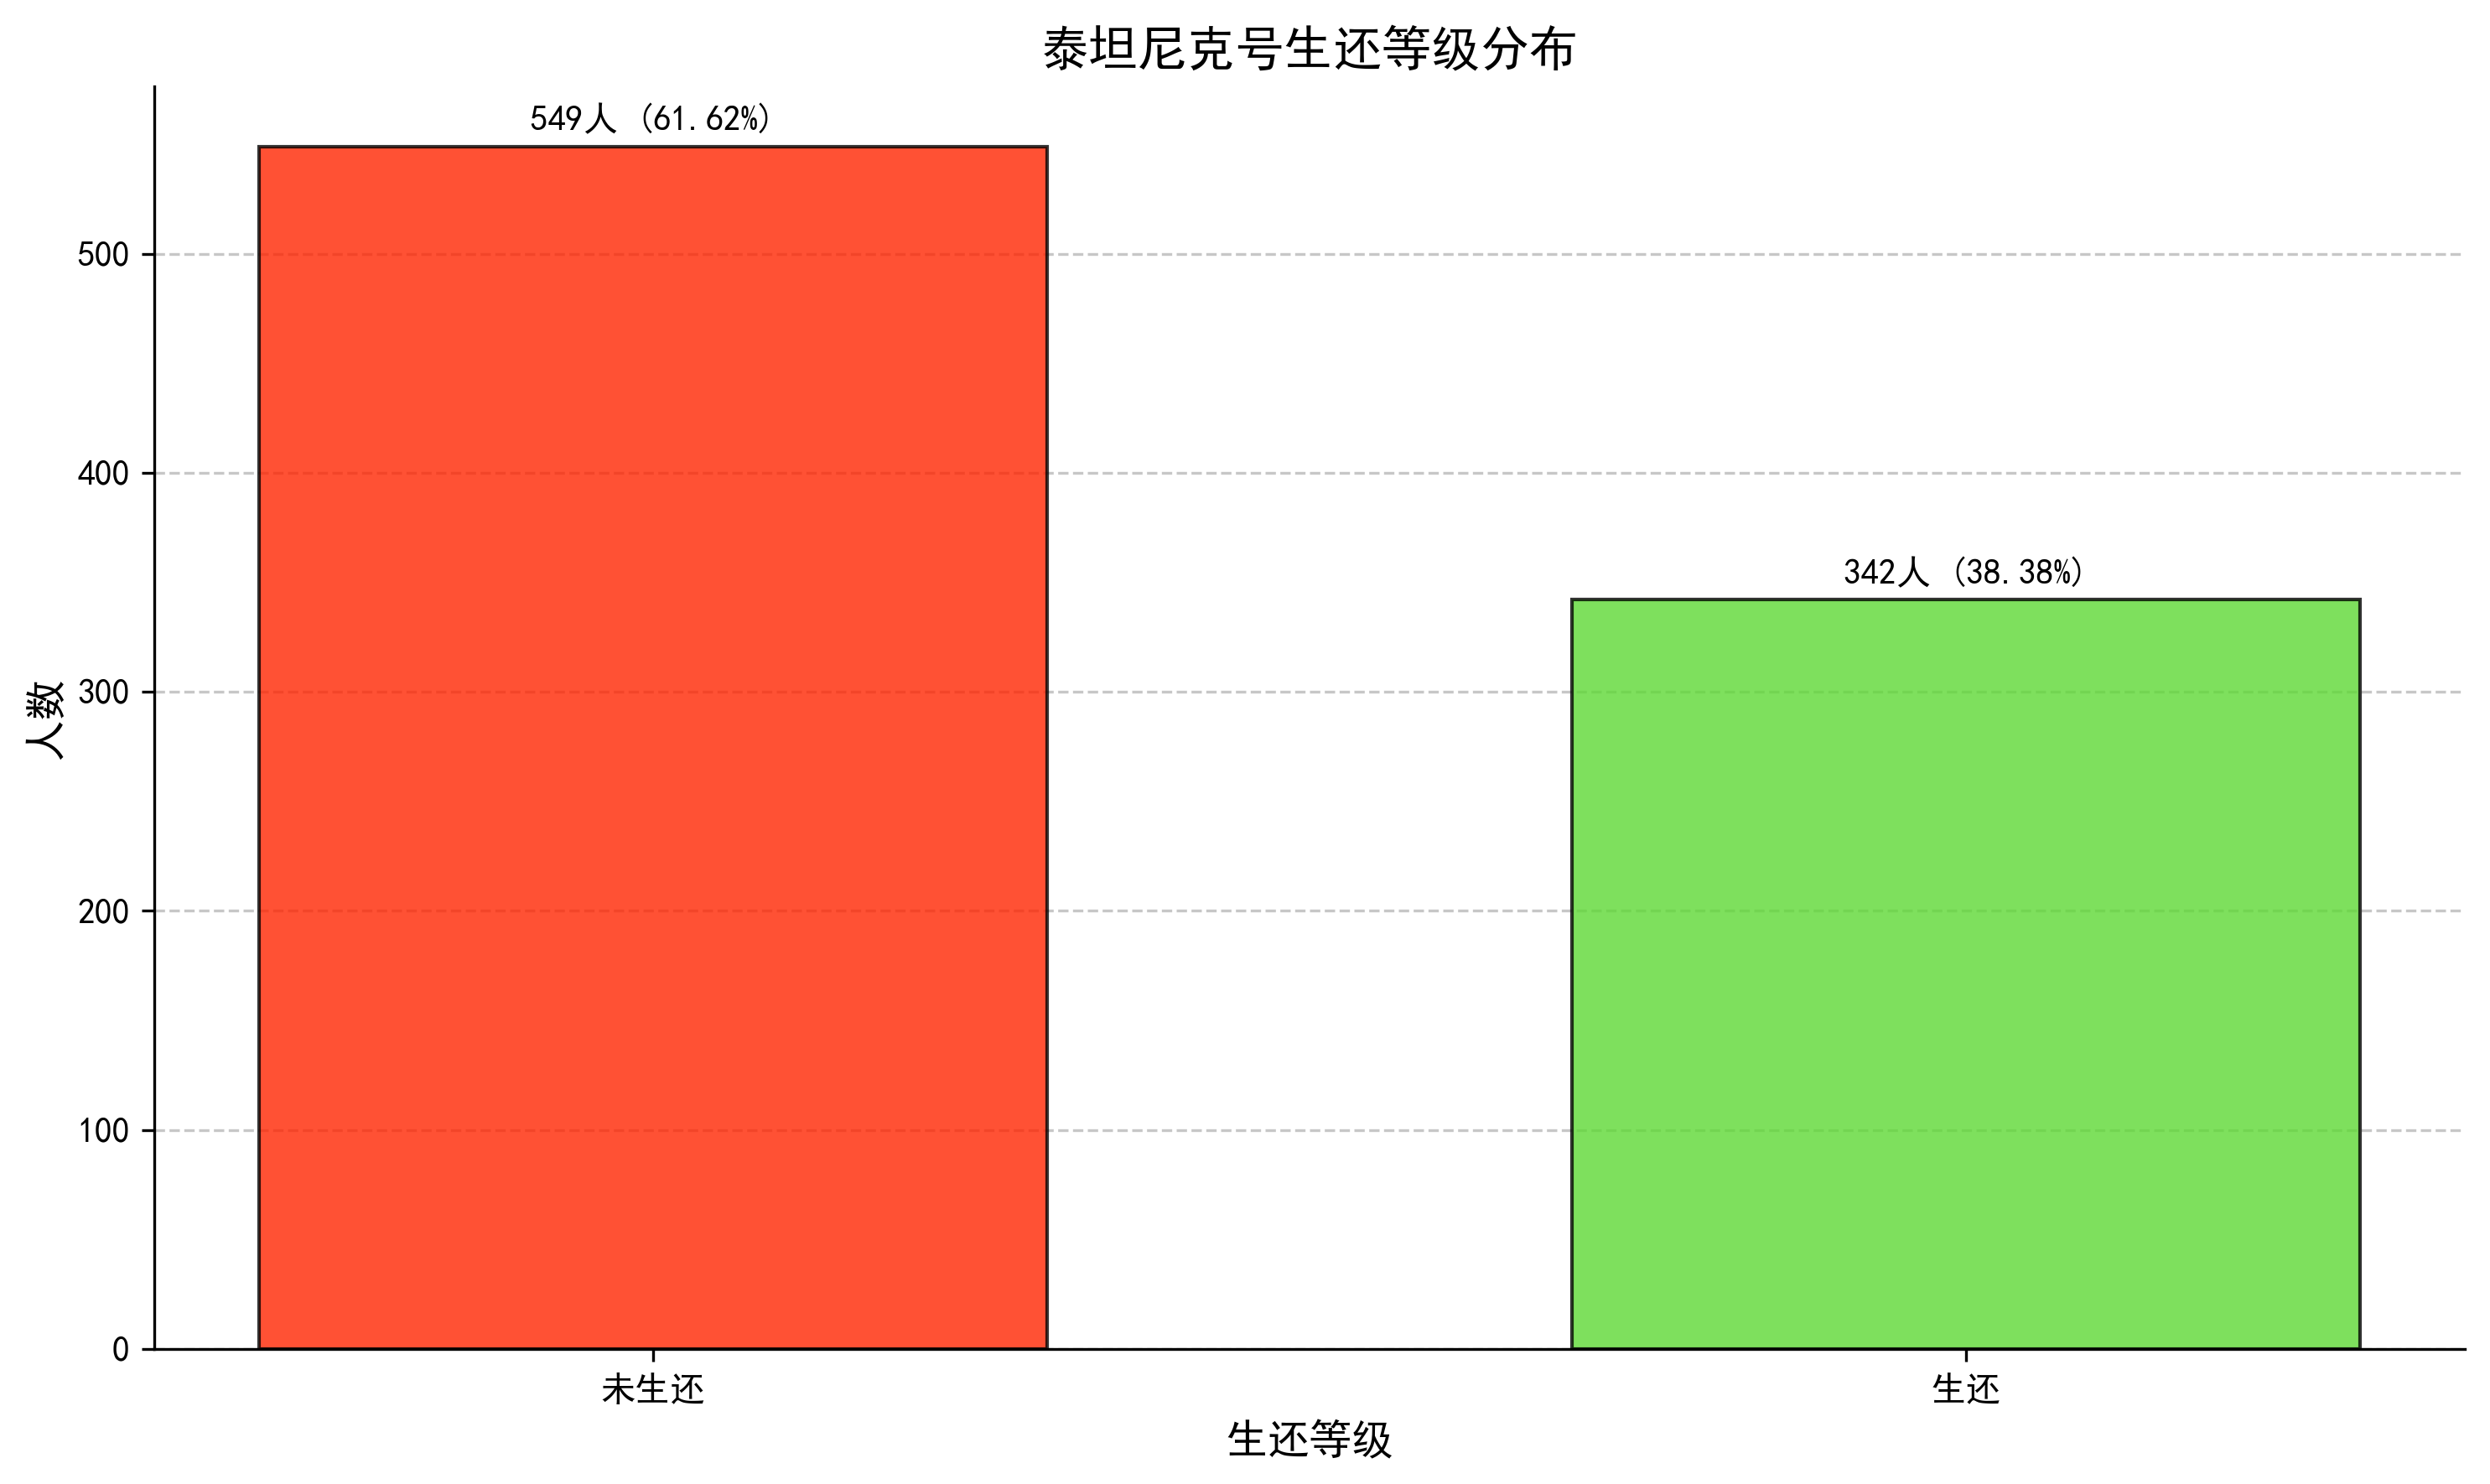


生还者年龄统计信息：
count    290.00
mean      28.34
std       14.95
min        0.42
25%       19.00
50%       28.00
75%       36.00
max       80.00
Name: Age, dtype: float64


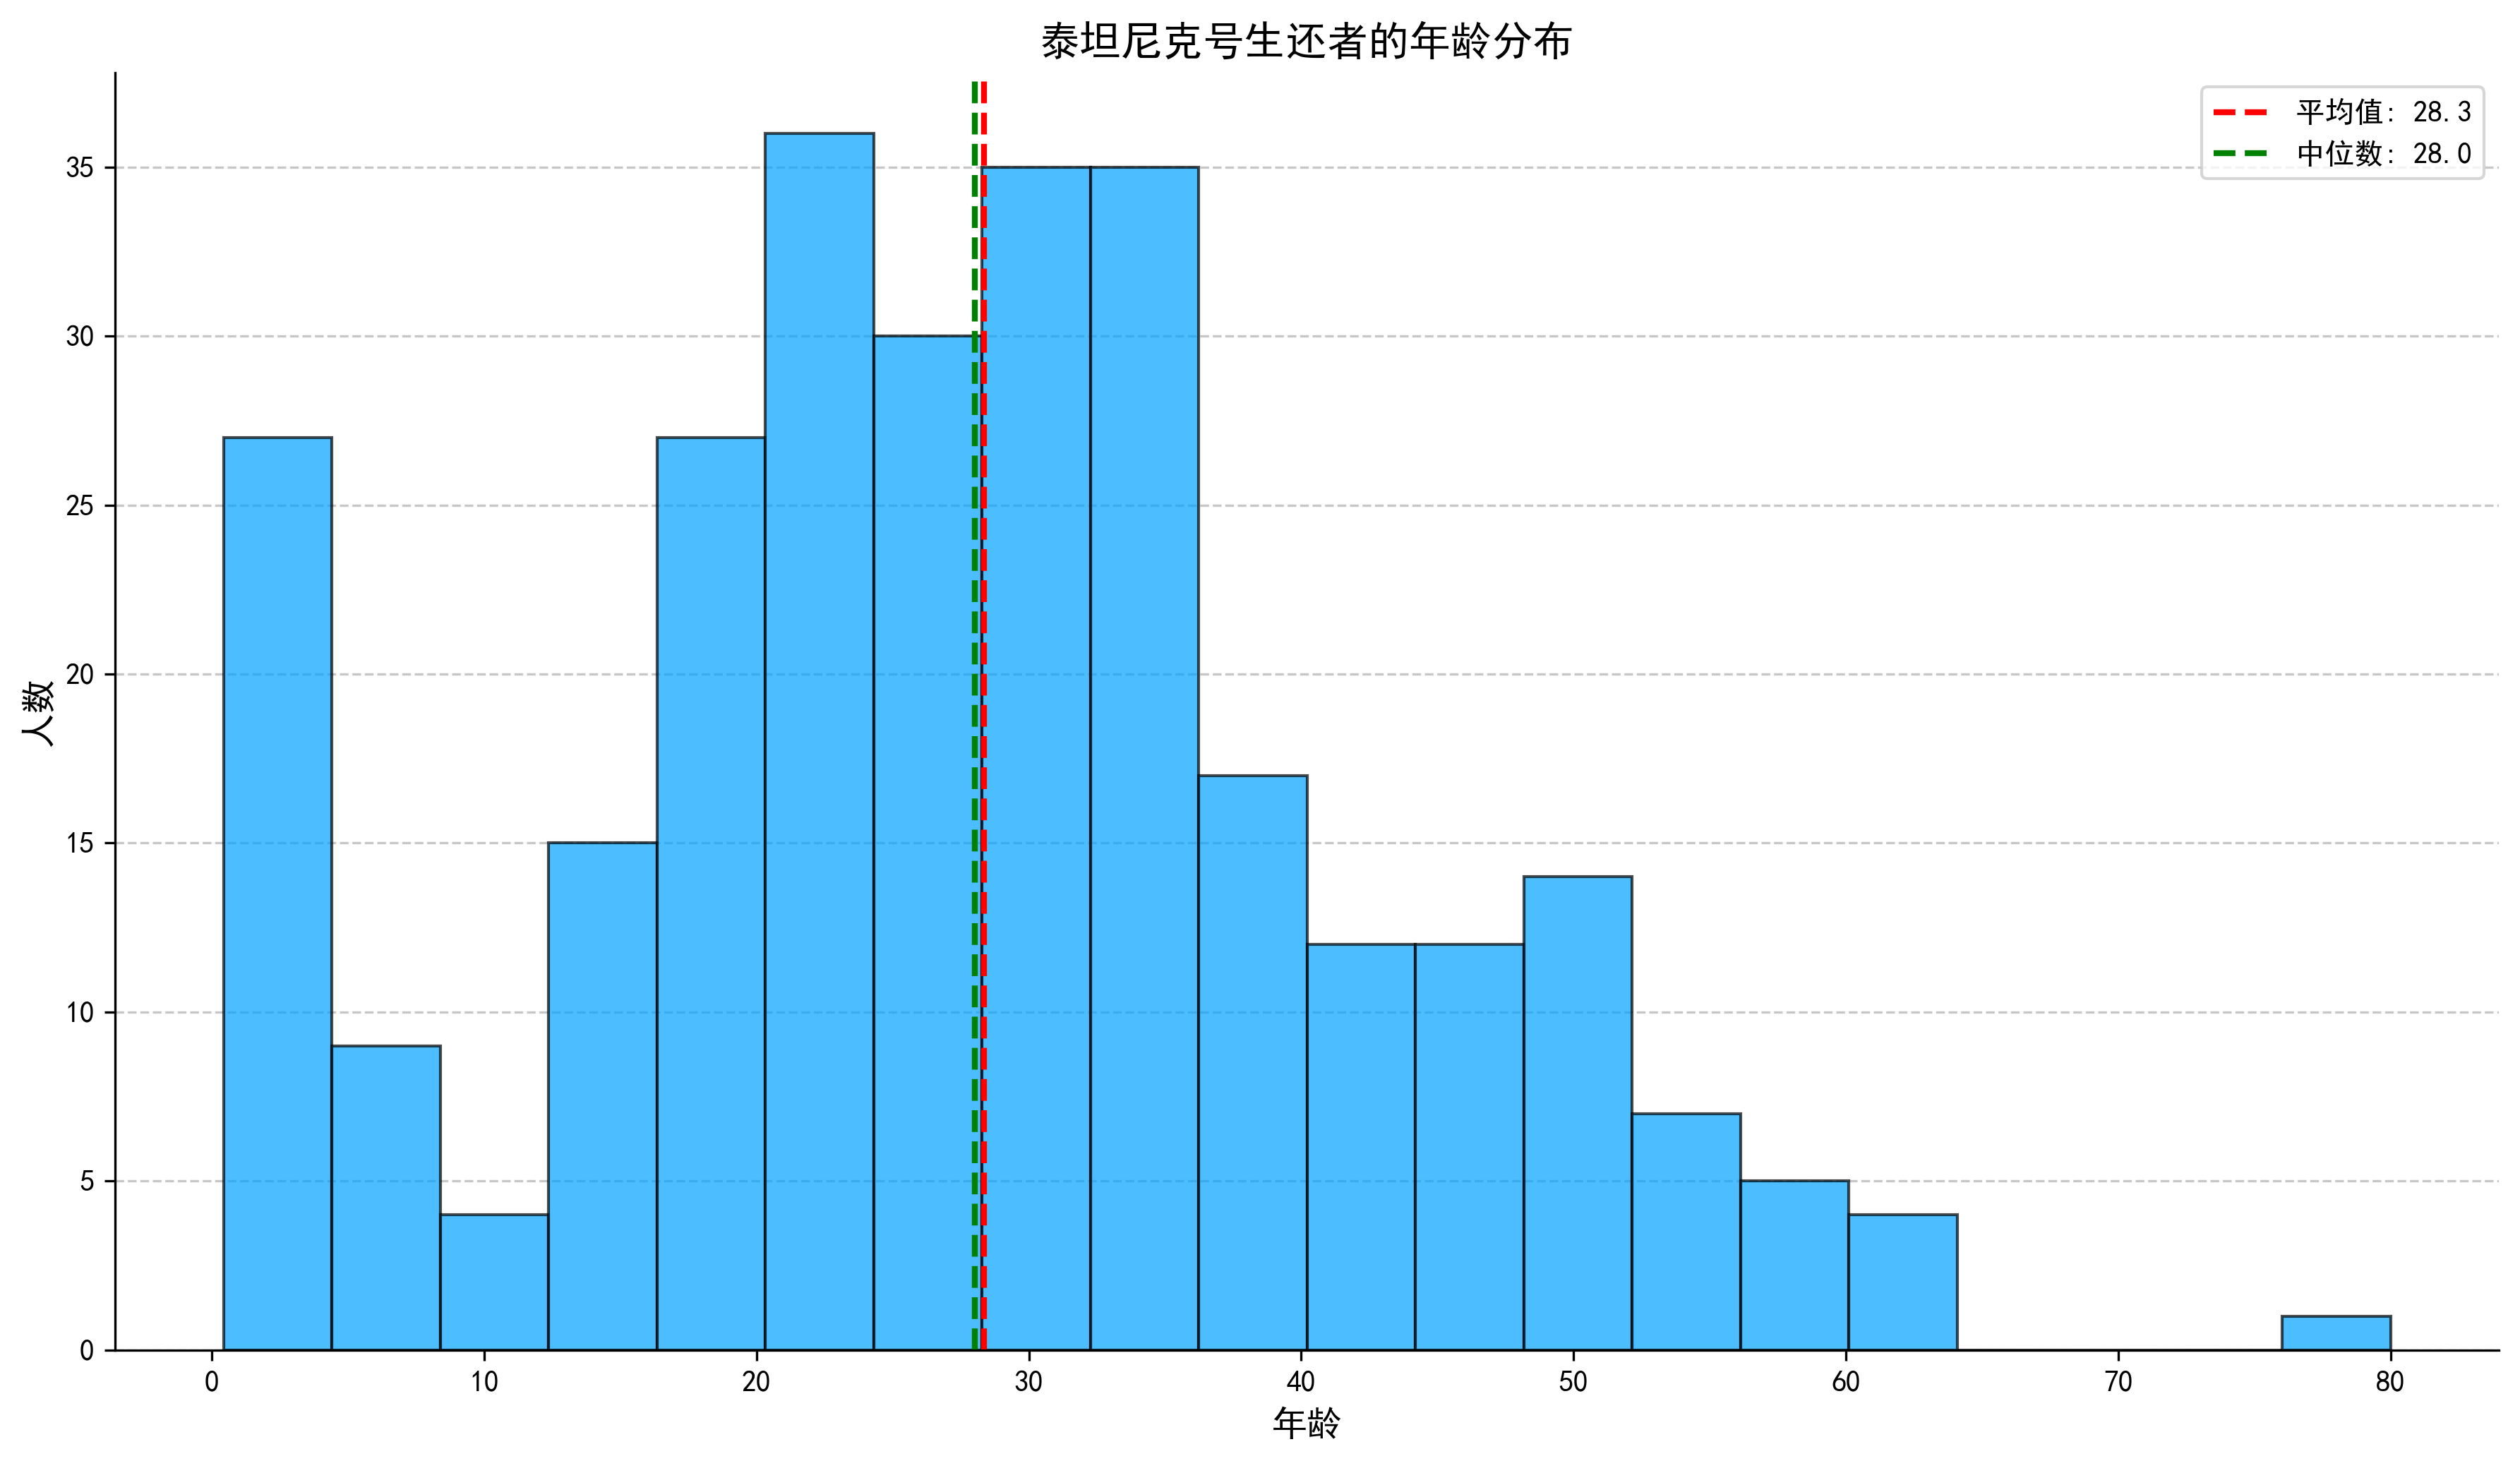

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'WenQuanYi Micro Hei', 'Heiti TC']

# 文件路径（请根据实际情况修改）
file_path = r"C:\Users\HONOR\Desktop\train.csv"

try:
    # 读取CSV文件
    df = pd.read_csv(file_path)
    
    # 查看数据基本信息
    print("数据基本信息：")
    df.info()
    
    # 查看数据集行数和列数
    rows, columns = df.shape
    
    if rows == 0:
        print("错误：数据集中没有记录")
    else:
        # 计算不同乘客等级的生还率
        survival_by_class = df.groupby('Pclass')['Survived'].mean().reset_index()
        
        # 重命名列以便更好地理解
        survival_by_class.columns = ['乘客等级', '生还率']
        
        # 显示计算结果
        print("\n不同乘客等级的生还率：")
        print(survival_by_class)
        
        # 绘制乘客等级生还率直方图
        plt.figure(figsize=(10, 6))
        
        # 设置柱状图参数
        bars = plt.bar(
            survival_by_class['乘客等级'],
            survival_by_class['生还率'],
            color=['#00A1FF', '#5ed935', '#f8ba00'],  # 使用不同颜色区分等级
            width=0.6,
            edgecolor='black',
            alpha=0.8,
            zorder=2
        )
        
        # 在每个柱子上方显示具体数值
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2%}',
                ha='center', va='bottom', fontsize=10
            )
        
        # 添加标题和标签
        plt.title('泰坦尼克号乘客等级对生还率的影响', fontsize=14)
        plt.xlabel('乘客等级', fontsize=12)
        plt.ylabel('生还率', fontsize=12)
        
        # 设置x轴刻度为整数1, 2, 3
        plt.xticks(survival_by_class['乘客等级'])
        
        # 设置y轴范围为0-1
        plt.ylim(0, 1)
        
        # 添加网格线
        plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
        
        # 优化图表样式
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        
        # 显示图形
        plt.tight_layout()
        plt.show()
        
        # 计算生还等级分布
        survival_counts = df['Survived'].value_counts().sort_index()
        
        # 转换为DataFrame以便更好地处理
        survival_distribution = pd.DataFrame({
            '生还等级': ['未生还', '生还'],
            '人数': survival_counts.values,
            '比例': survival_counts.values / survival_counts.sum()
        })
        
        # 显示计算结果
        print("\n生还等级分布：")
        print(survival_distribution)
        
        # 绘制生还等级分布直方图
        plt.figure(figsize=(10, 6))
        
        # 设置柱状图参数
        bars = plt.bar(
            survival_distribution['生还等级'],
            survival_distribution['人数'],
            color=['#ff2501', '#5ed935'],  # 使用不同颜色区分生还状态
            width=0.6,
            edgecolor='black',
            alpha=0.8,
            zorder=2
        )
        
        # 在每个柱子上方显示具体数值和百分比
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2., height + 5,
                f'{height}人 ({height/survival_counts.sum():.2%})',
                ha='center', va='bottom', fontsize=10
            )
        
        # 添加标题和标签
        plt.title('泰坦尼克号生还等级分布', fontsize=14)
        plt.xlabel('生还等级', fontsize=12)
        plt.ylabel('人数', fontsize=12)
        
        # 添加网格线
        plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
        
        # 优化图表样式
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        
        # 显示图形
        plt.tight_layout()
        plt.show()
        
        # 筛选生还者的年龄数据（去除缺失值）
        survived_ages = df[df['Survived'] == 1]['Age'].dropna()
        
        if len(survived_ages) == 0:
            print("错误：没有生还者的年龄数据")
        else:
            # 计算年龄分布的基本统计信息
            age_stats = survived_ages.describe().round(2)
            print("\n生还者年龄统计信息：")
            print(age_stats)
            
            # 绘制生还者年龄分布直方图
            plt.figure(figsize=(12, 7))
            
            # 设置直方图参数
            n, bins, patches = plt.hist(
                survived_ages,
                bins=20,  # 可以调整bin的数量以获得不同的粒度
                color='#00A1FF',
                edgecolor='black',
                alpha=0.7,
                zorder=2
            )
            
            # 添加标题和标签
            plt.title('泰坦尼克号生还者的年龄分布', fontsize=14)
            plt.xlabel('年龄', fontsize=12)
            plt.ylabel('人数', fontsize=12)
            
            # 在直方图上方添加平均值和中位数的参考线
            plt.axvline(survived_ages.mean(), color='red', linestyle='dashed', linewidth=2, label=f'平均值: {survived_ages.mean():.1f}')
            plt.axvline(survived_ages.median(), color='green', linestyle='dashed', linewidth=2, label=f'中位数: {survived_ages.median():.1f}')
            
            # 添加网格线
            plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
            
            # 添加图例
            plt.legend()
            
            # 优化图表样式
            plt.gca().spines['top'].set_visible(False)
            plt.gca().spines['right'].set_visible(False)
            
            # 显示图形
            plt.tight_layout()
            plt.show()

except FileNotFoundError:
    print(f"错误：文件 {file_path} 不存在，请检查文件路径是否正确。")
except Exception as e:
    print(f"处理数据时发生错误：{str(e)}")   